In [99]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

In [40]:
stocks = pd.read_csv("stocks.csv", header= [0,1], index_col= [0], parse_dates= [0])

In [41]:
stocks.head()

Adj Close                                                         \
                AAPL         BA        DIS        IBM         KO       MSFT   
Date                                                                          
2010-01-04  6.496297  43.777550  27.933918  79.247482  18.793240  23.572371   
2010-01-05  6.507526  45.211342  27.864241  78.290115  18.565905  23.579987   
2010-01-06  6.404014  46.582794  27.716164  77.781578  18.559315  23.435276   
2010-01-07  6.392177  48.468559  27.724876  77.512337  18.513182  23.191555   
2010-01-08  6.434673  48.001011  27.768427  78.290115  18.170528  23.351498   

               Close                                    ...   Open  \
                AAPL         BA        DIS         IBM  ...    DIS   
Date                                                    ...          
2010-01-04  7.643214  56.180000  32.070000  126.625237  ...  32.50   
2010-01-05  7.656429  58.020000  31.990000  125.095604  ...  32.07   
2010-01-06  7.534643  59.779999  31.820000  124.282982  ...  31.90   
2010-01-07  7.520714  62.200001  31.830000  123.852776  ...  31.77   
2010-01-08  7.570714  61.599998  31.879999  125.095604  ...  31.66   

                                                 Volume                      \
                   IBM         KO       MSFT       AAPL        BA       DIS   
Date                                                                          
2010-01-04  125.411087  28.580000  30.620001  493729600   6186700  13700400   
2010-01-05  125.889099  28.424999  30.850000  601904800   8867800  10307700   
2010-01-06  124.933075  28.174999  30.879999  552160000   8836500  10709500   
2010-01-07  124.158699  28.165001  30.629999  477131200  14379100   8202100   
2010-01-08  123.393883  27.730000  30.280001  447610800   7146600   7657500   

                                         
                IBM        KO      MSFT  
Date                                     
2010-01-04  6438444  13870400  38409100  
2010-01-05  7156104  23172400  49749600  
2010-01-06  5863144  19264600  58182400  
2010-01-07  6109268  13234600  50559700  
2010-01-08  4390271  28712400  51197400  

[5 rows x 36 columns]

In [42]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2288 entries, 2010-01-04 to 2019-02-05
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2288 non-null   float64
 1   (Adj Close, BA)    2288 non-null   float64
 2   (Adj Close, DIS)   2288 non-null   float64
 3   (Adj Close, IBM)   2288 non-null   float64
 4   (Adj Close, KO)    2288 non-null   float64
 5   (Adj Close, MSFT)  2288 non-null   float64
 6   (Close, AAPL)      2288 non-null   float64
 7   (Close, BA)        2288 non-null   float64
 8   (Close, DIS)       2288 non-null   float64
 9   (Close, IBM)       2288 non-null   float64
 10  (Close, KO)        2288 non-null   float64
 11  (Close, MSFT)      2288 non-null   float64
 12  (High, AAPL)       2288 non-null   float64
 13  (High, BA)         2288 non-null   float64
 14  (High, DIS)        2288 non-null   float64
 15  (High, IBM)        2288 non-null   float64
 16  (High,

In [43]:
stocks.describe()

Adj Close                                                      \
              AAPL           BA          DIS          IBM           KO   
count  2288.000000  2288.000000  2288.000000  2288.000000  2288.000000   
mean     22.771155   130.186519    71.644731   108.685904    30.069708   
std      11.600558    88.687438    29.810688    14.514471     6.343180   
min       5.829697    43.777550    25.536148    73.228348    16.635141   
25%      13.369707    60.522976    38.754956   101.528509    25.759313   
50%      21.226297   111.242416    79.027557   110.499184    30.614755   
75%      28.620335   135.417168    99.533253   120.004368    34.889083   
max      55.640354   398.570587   116.560318   136.638641    43.803974   

                          Close                                         ...  \
              MSFT         AAPL           BA          DIS          IBM  ...   
count  2288.000000  2288.000000  2288.000000  2288.000000  2288.000000  ...   
mean     43.083834    25.010675   144.103820    76.582640   157.148967  ...   
std      24.593835    11.723928    88.320854    29.829775    23.090712  ...   
min      17.686451     6.858929    56.180000    29.000000   102.839386  ...   
25%      23.102088    15.426250    73.755001    43.477500   139.569794  ...   
50%      36.023315    23.747499   127.639999    85.869999   154.923515  ...   
75%      53.537119    31.697500   152.267502   104.220001   177.746178  ...   
max     109.764473    58.017502   410.179993   121.690002   206.309753  ...   

              Open                                               Volume  \
               DIS          IBM           KO         MSFT          AAPL   
count  2288.000000  2288.000000  2288.000000  2288.000000  2.288000e+03   
mean     76.578059   157.093598    39.371628    48.656967  3.187215e+08   
std      29.861050    23.077858     5.565342    24.466094  2.380917e+08   
min      28.730000   103.250481    25.110001    23.090000  4.590360e+07   
25%      43.492500   139.586521    36.186249    28.965000  1.371571e+08   
50%      86.084999   154.875717    40.695000    41.610001  2.497872e+08   
75%     104.230003   177.449814    43.322500    58.722501  4.298973e+08   
max     121.500000   205.908218    50.820000   115.419998  1.880998e+09   

                                                                             
                 BA           DIS           IBM            KO          MSFT  
count  2.288000e+03  2.288000e+03  2.288000e+03  2.288000e+03  2.288000e+03  
mean   4.601274e+06  8.775748e+06  5.025515e+06  1.503227e+07  4.155095e+07  
std    2.440871e+06  4.907867e+06  2.643450e+06  6.574772e+06  2.339253e+07  
min    7.889000e+05  2.165700e+06  1.247878e+06  2.996300e+06  7.425600e+06  
25%    3.110000e+06  6.053675e+06  3.462156e+06  1.082630e+07  2.590040e+07  
50%    4.091200e+06  7.602750e+06  4.357636e+06  1.355170e+07  3.600365e+07  
75%    5.332025e+06  9.948850e+06  5.648164e+06  1.755170e+07  5.160548e+07  
max    4.439180e+07  8.704850e+07  3.189275e+07  9.896750e+07  3.193179e+08  

[8 rows x 36 columns]

In [44]:
close = stocks.loc[: , "Close"].copy()

In [45]:
close

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-04,7.643214,56.180000,32.070000,126.625237,28.520000,30.950001
2010-01-05,7.656429,58.020000,31.990000,125.095604,28.174999,30.959999
2010-01-06,7.534643,59.779999,31.820000,124.282982,28.165001,30.770000
2010-01-07,7.520714,62.200001,31.830000,123.852776,28.094999,30.450001
2010-01-08,7.570714,61.599998,31.879999,125.095604,27.575001,30.660000
...,...,...,...,...,...,...
2019-01-30,41.312500,387.720001,110.129997,128.470367,47.860001,106.379997
2019-01-31,41.610001,385.619995,111.519997,128.508606,48.130001,104.430000
2019-02-01,41.630001,387.429993,111.300003,128.202682,48.700001,102.779999


In [46]:
plt.rcdefaults()
#plt.style.use("seaborn")

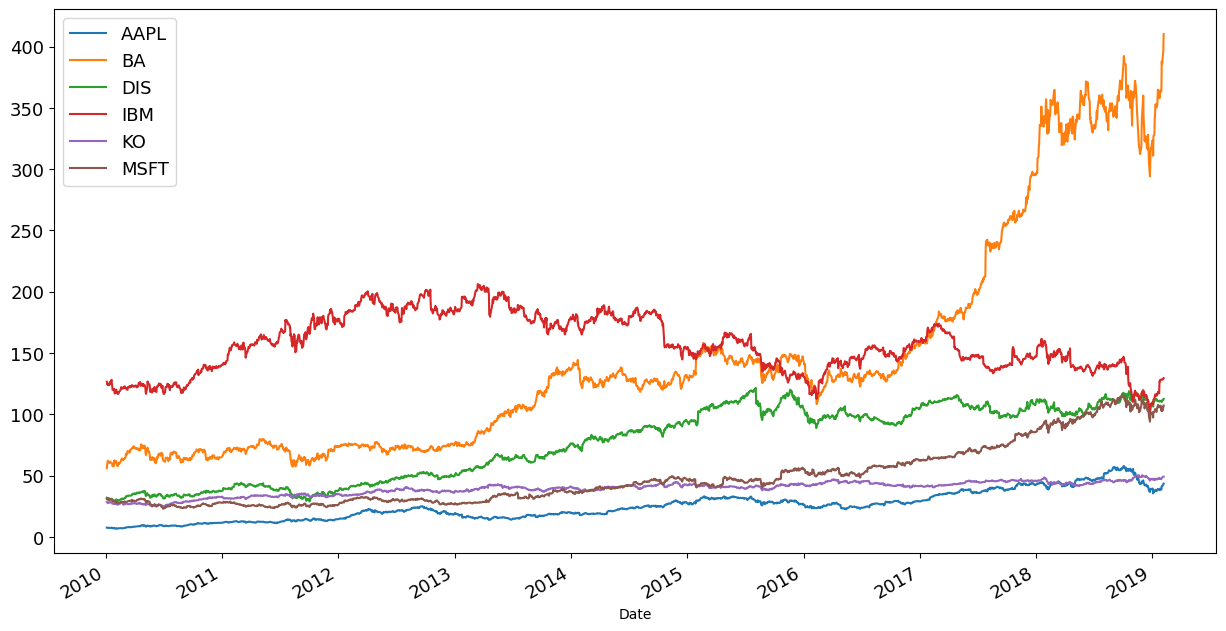

In [47]:
close.plot(figsize= (15, 8), fontsize= 13)
plt.legend(fontsize = 13)
plt.show()

# Normalazing Time Series to a Base Value (100)

In [48]:
close.head()


,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-04,7.643214,56.180000,32.070000,126.625237,28.520000,30.950001
2010-01-05,7.656429,58.020000,31.990000,125.095604,28.174999,30.959999
2010-01-06,7.534643,59.779999,31.820000,124.282982,28.165001,30.770000
2010-01-07,7.520714,62.200001,31.830000,123.852776,28.094999,30.450001
2010-01-08,7.570714,61.599998,31.879999,125.095604,27.575001,30.660000


In [49]:
close.iloc[0,0]

7.643214225769043

In [50]:
close.AAPL.div(close.iloc[0,0]).mul(100) # Cała kolumne jest dzielona prez pierwszą wartosc wiec ta przyjuje sama wartość 1, nastsepnie mnozenie

Date
2010-01-04    100.000000
2010-01-05    100.172893
2010-01-06     98.579511
2010-01-07     98.397266
2010-01-08     99.051443
                 ...    
2019-01-30    540.512130
2019-01-31    544.404479
2019-02-01    544.666155
2019-02-04    560.137381
2019-02-05    569.721022
Name: AAPL, Length: 2288, dtype: float64

In [51]:
close.apply(lambda x: x.div(x[0]).mul(100))

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.172893,103.275187,99.750546,98.792000,98.790318,100.032305
2010-01-06,98.579511,106.407972,99.220455,98.150247,98.755261,99.418416
2010-01-07,98.397266,110.715558,99.251638,97.810499,98.509814,98.384491
2010-01-08,99.051443,109.647558,99.407544,98.792000,96.686537,99.063002
...,...,...,...,...,...,...
2019-01-30,540.512130,690.138838,343.405046,101.457159,167.812061,343.715653
2019-01-31,544.404479,686.400842,347.739313,101.487357,168.758767,337.415178
2019-02-01,544.666155,689.622625,347.053334,101.245760,170.757363,332.083994


In [52]:
norm = close.div(close.iloc[0]).mul(100) # Vectorized OPERATION
norm

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.172893,103.275187,99.750546,98.792000,98.790318,100.032305
2010-01-06,98.579511,106.407972,99.220455,98.150247,98.755261,99.418416
2010-01-07,98.397266,110.715558,99.251638,97.810499,98.509814,98.384491
2010-01-08,99.051443,109.647558,99.407544,98.792000,96.686537,99.063002
...,...,...,...,...,...,...
2019-01-30,540.512130,690.138838,343.405046,101.457159,167.812061,343.715653
2019-01-31,544.404479,686.400842,347.739313,101.487357,168.758767,337.415178
2019-02-01,544.666155,689.622625,347.053334,101.245760,170.757363,332.083994


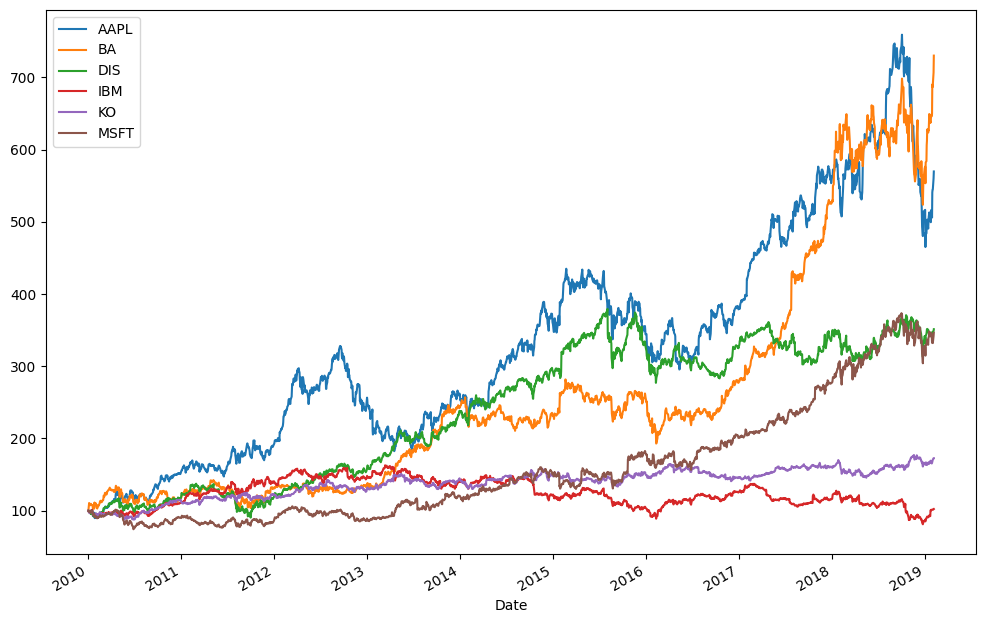

In [53]:
norm.plot(figsize= (12, 8)) # Teraz wszystkie startuja z tego samego punktu wiec łatwiej je porównać, na Y mamwy wzrost procentowy
plt.show()

# The `shift()` method

In [54]:
aapl = close.AAPL.copy().to_frame()

In [55]:
aapl.head()

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [56]:
aapl.shift(periods= 1) # SQL Lag

,AAPL
Date,
2010-01-04,NaN
2010-01-05,7.643214
2010-01-06,7.656429
2010-01-07,7.534643
2010-01-08,7.520714
...,...
2019-01-30,38.669998
2019-01-31,41.312500
2019-02-01,41.610001


In [57]:
aapl['lag1'] = aapl.shift(periods= 1)

In [58]:
aapl.AAPL.sub(aapl.lag1)

Date
2010-01-04         NaN
2010-01-05    0.013215
2010-01-06   -0.121786
2010-01-07   -0.013929
2010-01-08    0.050000
                ...   
2019-01-30    2.642502
2019-01-31    0.297501
2019-02-01    0.020000
2019-02-04    1.182499
2019-02-05    0.732498
Length: 2288, dtype: float64

In [59]:
aapl["Diff"] = aapl.AAPL.sub(aapl.lag1)

In [60]:
aapl.head()

,AAPL,lag1,Diff
Date,,,
2010-01-04,7.643214,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215
2010-01-06,7.534643,7.656429,-0.121786
2010-01-07,7.520714,7.534643,-0.013929
2010-01-08,7.570714,7.520714,0.050000


In [61]:
aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

Date
2010-01-04         NaN
2010-01-05    0.172893
2010-01-06   -1.590632
2010-01-07   -0.184871
2010-01-08    0.664833
                ...   
2019-01-30    6.833468
2019-01-31    0.720123
2019-02-01    0.048066
2019-02-04    2.840497
2019-02-05    1.710945
Length: 2288, dtype: float64

In [62]:
aapl["pct_change"] = aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

In [63]:
aapl

,AAPL,lag1,Diff,pct_change
Date,,,,
2010-01-04,7.643214,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,0.172893
2010-01-06,7.534643,7.656429,-0.121786,-1.590632
2010-01-07,7.520714,7.534643,-0.013929,-0.184871
2010-01-08,7.570714,7.520714,0.050000,0.664833
...,...,...,...,...
2019-01-30,41.312500,38.669998,2.642502,6.833468
2019-01-31,41.610001,41.312500,0.297501,0.720123
2019-02-01,41.630001,41.610001,0.020000,0.048066


# `diff()` and `pct_change()` methods

In [64]:
aapl.AAPL.diff(periods= 1) # Krótsza wersja niz z SHIFT()

Date
2010-01-04         NaN
2010-01-05    0.013215
2010-01-06   -0.121786
2010-01-07   -0.013929
2010-01-08    0.050000
                ...   
2019-01-30    2.642502
2019-01-31    0.297501
2019-02-01    0.020000
2019-02-04    1.182499
2019-02-05    0.732498
Name: AAPL, Length: 2288, dtype: float64

In [65]:
aapl["Diff2"] = aapl.AAPL.diff(periods= 1)

In [66]:
aapl.AAPL.pct_change(periods = 1)

Date
2010-01-04         NaN
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
                ...   
2019-01-30    0.068335
2019-01-31    0.007201
2019-02-01    0.000481
2019-02-04    0.028405
2019-02-05    0.017109
Name: AAPL, Length: 2288, dtype: float64

In [67]:
aapl["pct_change2"] = aapl.AAPL.pct_change(periods = 1).mul(100)

In [68]:
aapl

,AAPL,lag1,Diff,pct_change,Diff2,pct_change2
Date,,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,0.172893,0.013215,0.172893
2010-01-06,7.534643,7.656429,-0.121786,-1.590632,-0.121786,-1.590632
2010-01-07,7.520714,7.534643,-0.013929,-0.184871,-0.013929,-0.184871
2010-01-08,7.570714,7.520714,0.050000,0.664833,0.050000,0.664833
...,...,...,...,...,...,...
2019-01-30,41.312500,38.669998,2.642502,6.833468,2.642502,6.833468
2019-01-31,41.610001,41.312500,0.297501,0.720123,0.297501,0.720123
2019-02-01,41.630001,41.610001,0.020000,0.048066,0.020000,0.048066


In [69]:
aapl.AAPL.resample("M").last() # Ostatnie ceny zamniecia w danym miesiącu


Date
2010-01-31     6.859286
2010-02-28     7.307857
2010-03-31     8.392857
2010-04-30     9.324643
2010-05-31     9.174286
                ...    
2018-10-31    54.715000
2018-11-30    44.645000
2018-12-31    39.435001
2019-01-31    41.610001
2019-02-28    43.544998
Freq: M, Name: AAPL, Length: 110, dtype: float64

### Procentowa zmiana w  okresach Miesiecznych



In [70]:
aapl.AAPL.resample("BM").last().pct_change(periods = 1).mul(100)

Date
2010-01-29          NaN
2010-02-26     6.539620
2010-03-31    14.847028
2010-04-30    11.102138
2010-05-31    -1.612472
                ...    
2018-10-31    -3.047756
2018-11-30   -18.404459
2018-12-31   -11.669838
2019-01-31     5.515403
2019-02-28     4.650319
Freq: BM, Name: AAPL, Length: 110, dtype: float64

# 217. Measuring Stock Performance with MEAN Returns and STD of Returns

In [71]:
aapl = close.AAPL.copy().to_frame()

In [72]:
ret = aapl.pct_change().dropna()
ret.head()

,AAPL
Date,
2010-01-05,0.001729
2010-01-06,-0.015906
2010-01-07,-0.001849
2010-01-08,0.006648
2010-01-11,-0.008821


In [73]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2287 entries, 2010-01-05 to 2019-02-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2287 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


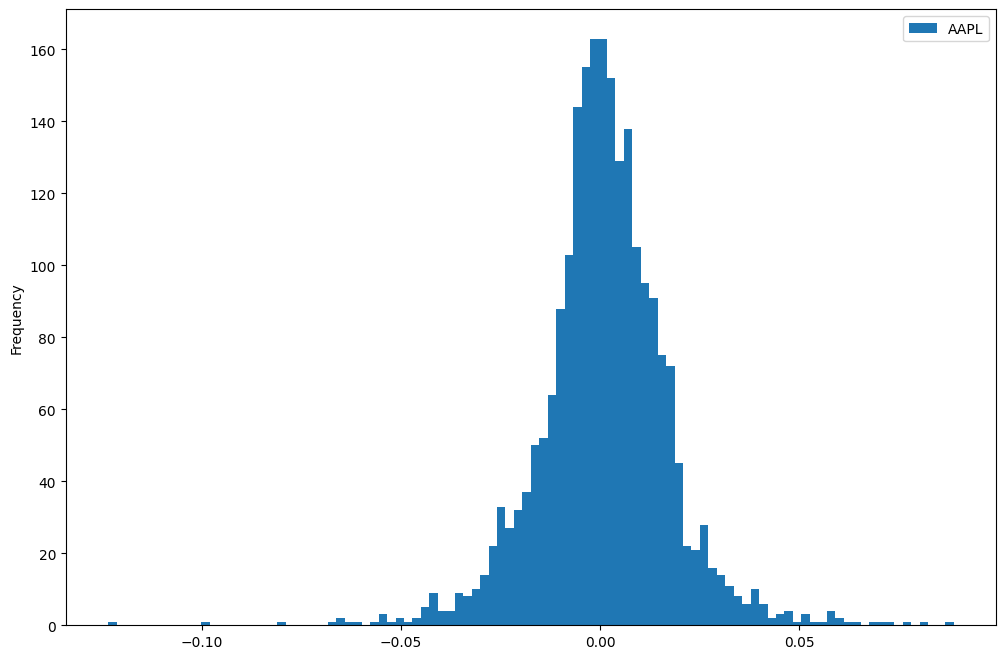

In [74]:
ret.plot(kind = "hist", figsize = (12, 8), bins = 100)
plt.show()
         

In [75]:
daily_mean_Return = ret.mean()
daily_mean_Return


AAPL    0.000896
dtype: float64

In [76]:
var_daily_Return = ret.var()
var_daily_Return

AAPL    0.000269
dtype: float64

In [77]:
std_daily_Return = np.sqrt(var_daily_Return)
std_daily_Return

AAPL    0.016394
dtype: float64

In [78]:
std_daily_Return = ret.std()
std_daily_Return

AAPL    0.016394
dtype: float64

In [79]:
NUMBER_OF_BUISENS_DAYS = 252

ann_mean_Return = daily_mean_Return * NUMBER_OF_BUISENS_DAYS
ann_mean_Return

AAPL    0.225708
dtype: float64

In [80]:
ann_var_Retrun = var_daily_Return * NUMBER_OF_BUISENS_DAYS
ann_var_Retrun

AAPL    0.067732
dtype: float64

In [81]:
ann_std_Return = np.sqrt(ann_var_Retrun)
ann_std_Return

AAPL    0.260254
dtype: float64

In [82]:
std_daily_Return * np.sqrt(NUMBER_OF_BUISENS_DAYS)

AAPL    0.260254
dtype: float64

# 218. Financial Time Series - Return and Risk

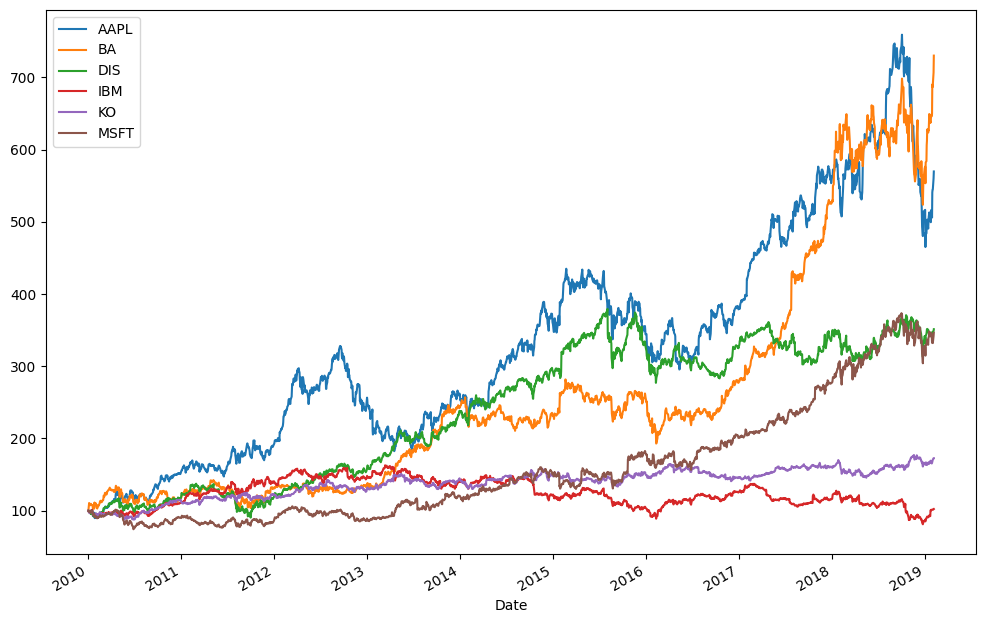

In [83]:
norm.plot(figsize= (12, 8))
plt.show()

In [84]:
close.head()

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-04,7.643214,56.180000,32.070000,126.625237,28.520000,30.950001
2010-01-05,7.656429,58.020000,31.990000,125.095604,28.174999,30.959999
2010-01-06,7.534643,59.779999,31.820000,124.282982,28.165001,30.770000
2010-01-07,7.520714,62.200001,31.830000,123.852776,28.094999,30.450001
2010-01-08,7.570714,61.599998,31.879999,125.095604,27.575001,30.660000


In [85]:
close.pct_change().dropna()


,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-05,0.001729,0.032752,-0.002495,-0.012080,-0.012097,0.000323
2010-01-06,-0.015906,0.030334,-0.005314,-0.006496,-0.000355,-0.006137
2010-01-07,-0.001849,0.040482,0.000314,-0.003462,-0.002485,-0.010400
2010-01-08,0.006648,-0.009646,0.001571,0.010035,-0.018509,0.006897
2010-01-11,-0.008821,-0.011851,-0.016311,-0.010470,0.020308,-0.012720
...,...,...,...,...,...,...
2019-01-30,0.068335,0.062509,-0.006943,0.000372,0.009705,0.033417
2019-01-31,0.007201,-0.005416,0.012621,0.000298,0.005641,-0.018330
2019-02-01,0.000481,0.004694,-0.001973,-0.002381,0.011843,-0.015800


In [86]:
ret = close.pct_change().dropna()

In [87]:
ret.describe()#.T

,AAPL,BA,DIS,IBM,KO,MSFT
count,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000
mean,0.000896,0.000990,0.000636,0.000088,0.000281,0.000650
std,0.016394,0.015488,0.013139,0.012429,0.009207,0.014579
min,-0.123558,-0.089290,-0.091708,-0.082790,-0.060291,-0.113995
25%,-0.007070,-0.007180,-0.005795,-0.005999,-0.004522,-0.006901
50%,0.000759,0.001100,0.000755,0.000213,0.000441,0.000354
75%,0.009667,0.009380,0.007530,0.006392,0.005465,0.008078
max,0.088741,0.098795,0.076302,0.088645,0.056872,0.104522


In [88]:
summary = ret.describe().T.loc[: , ["mean", "std"]]


In [89]:
summary

,mean,std
AAPL,0.000896,0.016394
BA,0.000990,0.015488
DIS,0.000636,0.013139
IBM,0.000088,0.012429
KO,0.000281,0.009207
MSFT,0.000650,0.014579


In [90]:
summary["mean"] = summary["mean"].mul(NUMBER_OF_BUISENS_DAYS)
summary["std"] = summary["std"] * np.sqrt(NUMBER_OF_BUISENS_DAYS)

In [91]:
summary

,mean,std
AAPL,0.225708,0.260254
BA,0.249376,0.245871
DIS,0.160287,0.208570
IBM,0.022081,0.197310
KO,0.070923,0.146161
MSFT,0.163698,0.231440


c:\Users\Przemo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


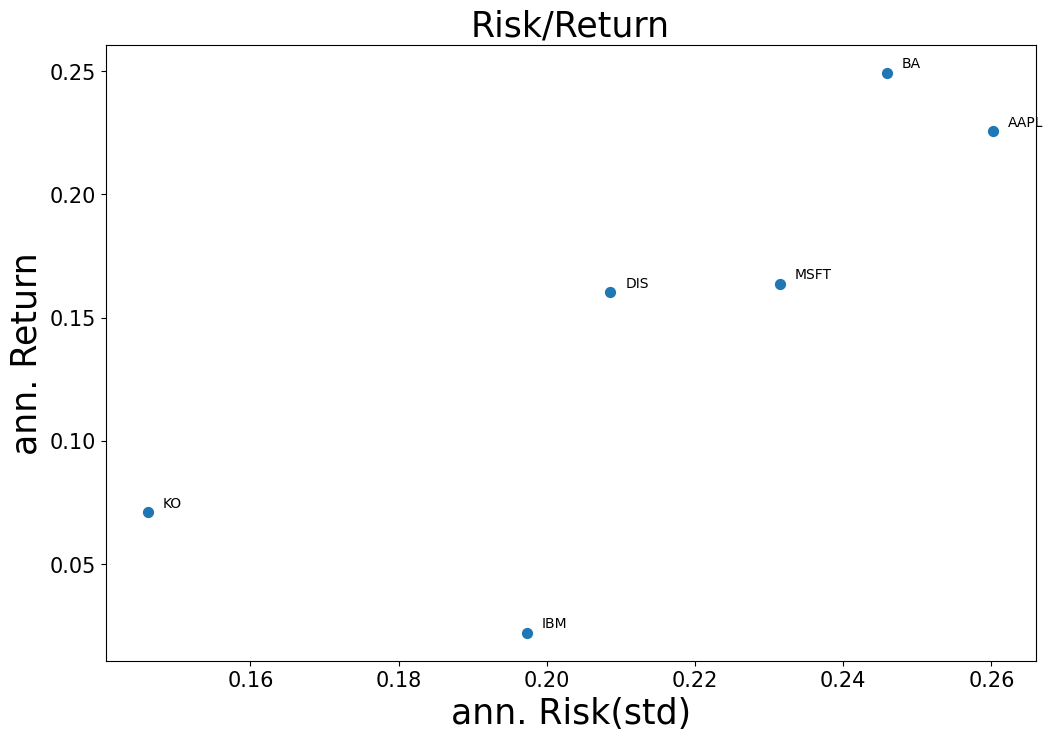

In [92]:
summary.plot.scatter(x = "std", y = "mean", figsize = (12, 8), s = 50, fontsize = 15)

for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"] + 0.002, summary.loc[i, "mean"] + 0.002))


plt.xlabel("ann. Risk(std)", fontsize = 25)
plt.ylabel("ann. Return", fontsize = 25)
plt.title("Risk/Return", fontsize = 25)
plt.show()

# 219. Financial Time Series - Covariance and Correlation


In [93]:
ret.head()

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-05,0.001729,0.032752,-0.002495,-0.012080,-0.012097,0.000323
2010-01-06,-0.015906,0.030334,-0.005314,-0.006496,-0.000355,-0.006137
2010-01-07,-0.001849,0.040482,0.000314,-0.003462,-0.002485,-0.010400
2010-01-08,0.006648,-0.009646,0.001571,0.010035,-0.018509,0.006897
2010-01-11,-0.008821,-0.011851,-0.016311,-0.010470,0.020308,-0.012720


### Covariance - na przekątnej wariacja. Reszta covarience

In [97]:
ret.cov()


,AAPL,BA,DIS,IBM,KO,MSFT
AAPL,0.000269,0.000104,0.000080,0.000076,0.000040,0.000107
BA,0.000104,0.000240,0.000105,0.000088,0.000057,0.000101
DIS,0.000080,0.000105,0.000173,0.000073,0.000052,0.000086
IBM,0.000076,0.000088,0.000073,0.000154,0.000047,0.000088
KO,0.000040,0.000057,0.000052,0.000047,0.000085,0.000051
MSFT,0.000107,0.000101,0.000086,0.000088,0.000051,0.000213


In [98]:
ret.corr()

,AAPL,BA,DIS,IBM,KO,MSFT
AAPL,1.000000,0.409917,0.373137,0.374747,0.266943,0.447157
BA,0.409917,1.000000,0.518342,0.459294,0.401417,0.446867
DIS,0.373137,0.518342,1.000000,0.448732,0.432673,0.450880
IBM,0.374747,0.459294,0.448732,1.000000,0.407401,0.485883
KO,0.266943,0.401417,0.432673,0.407401,1.000000,0.378181
MSFT,0.447157,0.446867,0.450880,0.485883,0.378181,1.000000


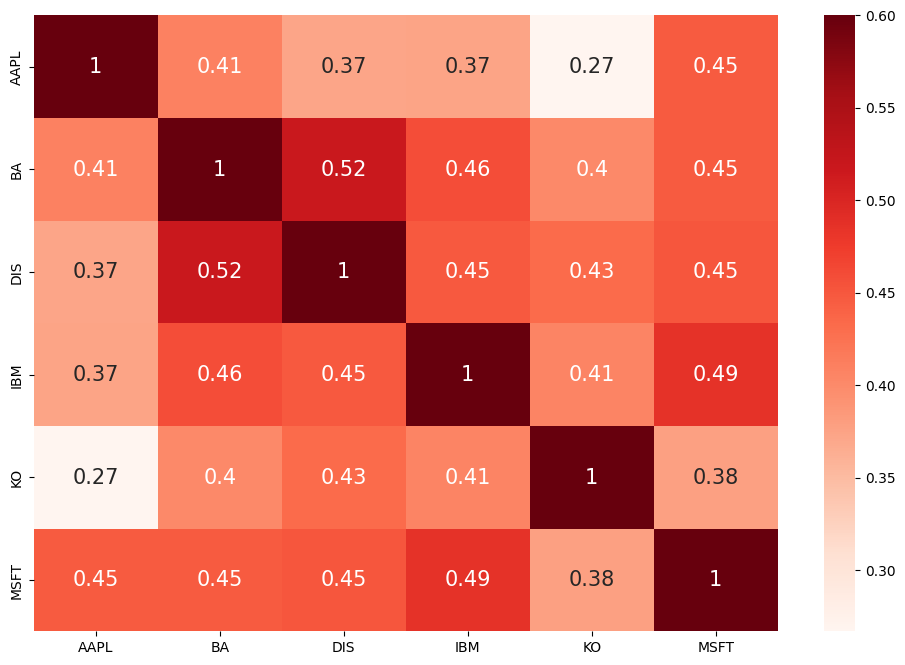

In [104]:
plt.figure(figsize= (12, 8))
sns.heatmap(ret.corr(), cmap= "Reds", annot= True, annot_kws={"size": 15}, vmax= 0.6)
plt.show()

# 220. Helpful DatetimeIndex Attributes and Methods


In [105]:
stocks.head()

Adj Close                                                         \
                AAPL         BA        DIS        IBM         KO       MSFT   
Date                                                                          
2010-01-04  6.496297  43.777550  27.933918  79.247482  18.793240  23.572371   
2010-01-05  6.507526  45.211342  27.864241  78.290115  18.565905  23.579987   
2010-01-06  6.404014  46.582794  27.716164  77.781578  18.559315  23.435276   
2010-01-07  6.392177  48.468559  27.724876  77.512337  18.513182  23.191555   
2010-01-08  6.434673  48.001011  27.768427  78.290115  18.170528  23.351498   

               Close                                    ...   Open  \
                AAPL         BA        DIS         IBM  ...    DIS   
Date                                                    ...          
2010-01-04  7.643214  56.180000  32.070000  126.625237  ...  32.50   
2010-01-05  7.656429  58.020000  31.990000  125.095604  ...  32.07   
2010-01-06  7.534643  59.779999  31.820000  124.282982  ...  31.90   
2010-01-07  7.520714  62.200001  31.830000  123.852776  ...  31.77   
2010-01-08  7.570714  61.599998  31.879999  125.095604  ...  31.66   

                                                 Volume                      \
                   IBM         KO       MSFT       AAPL        BA       DIS   
Date                                                                          
2010-01-04  125.411087  28.580000  30.620001  493729600   6186700  13700400   
2010-01-05  125.889099  28.424999  30.850000  601904800   8867800  10307700   
2010-01-06  124.933075  28.174999  30.879999  552160000   8836500  10709500   
2010-01-07  124.158699  28.165001  30.629999  477131200  14379100   8202100   
2010-01-08  123.393883  27.730000  30.280001  447610800   7146600   7657500   

                                         
                IBM        KO      MSFT  
Date                                     
2010-01-04  6438444  13870400  38409100  
2010-01-05  7156104  23172400  49749600  
2010-01-06  5863144  19264600  58182400  
2010-01-07  6109268  13234600  50559700  
2010-01-08  4390271  28712400  51197400  

[5 rows x 36 columns]

In [106]:
close.head()

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-04,7.643214,56.180000,32.070000,126.625237,28.520000,30.950001
2010-01-05,7.656429,58.020000,31.990000,125.095604,28.174999,30.959999
2010-01-06,7.534643,59.779999,31.820000,124.282982,28.165001,30.770000
2010-01-07,7.520714,62.200001,31.830000,123.852776,28.094999,30.450001
2010-01-08,7.570714,61.599998,31.879999,125.095604,27.575001,30.660000


In [107]:
close.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05'],
              dtype='datetime64[ns]', name='Date', length=2288, freq=None)

In [112]:
close.index.day

Int64Index([ 4,  5,  6,  7,  8, 11, 12, 13, 14, 15,
            ...
            23, 24, 25, 28, 29, 30, 31,  1,  4,  5],
           dtype='int64', name='Date', length=2288)

In [116]:
close.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Monday', 'Tuesday'],
      dtype='object', name='Date', length=2288)

In [118]:
close.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'February', 'February', 'February'],
      dtype='object', name='Date', length=2288)

In [119]:
close.index.days_in_month

Int64Index([31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
            ...
            31, 31, 31, 31, 31, 31, 31, 28, 28, 28],
           dtype='int64', name='Date', length=2288)

In [122]:
close.index.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='Date', length=2288)

In [123]:
close["Day"] = close.index.day_name()
close["Quarter"] = close.index.quarter

In [124]:
close.head()

,AAPL,BA,DIS,IBM,KO,MSFT,Day,Quarter
Date,,,,,,,,
2010-01-04,7.643214,56.180000,32.070000,126.625237,28.520000,30.950001,Monday,1
2010-01-05,7.656429,58.020000,31.990000,125.095604,28.174999,30.959999,Tuesday,1
2010-01-06,7.534643,59.779999,31.820000,124.282982,28.165001,30.770000,Wednesday,1
2010-01-07,7.520714,62.200001,31.830000,123.852776,28.094999,30.450001,Thursday,1
2010-01-08,7.570714,61.599998,31.879999,125.095604,27.575001,30.660000,Friday,1


In [126]:
all_days =pd.date_range(start= "2010-01-04", end="2019-02-06", freq= "D")
all_days

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-09', '2010-01-10', '2010-01-11',
               '2010-01-12', '2010-01-13',
               ...
               '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31',
               '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
               '2019-02-05', '2019-02-06'],
              dtype='datetime64[ns]', length=3321, freq='D')

In [129]:
close = close.reindex(all_days)
close.head(20)

,AAPL,BA,DIS,IBM,KO,MSFT,Day,Quarter
2010-01-04,7.643214,56.180000,32.070000,126.625237,28.520000,30.950001,Monday,1.0
2010-01-05,7.656429,58.020000,31.990000,125.095604,28.174999,30.959999,Tuesday,1.0
2010-01-06,7.534643,59.779999,31.820000,124.282982,28.165001,30.770000,Wednesday,1.0
2010-01-07,7.520714,62.200001,31.830000,123.852776,28.094999,30.450001,Thursday,1.0
2010-01-08,7.570714,61.599998,31.879999,125.095604,27.575001,30.660000,Friday,1.0
2010-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,7.503929,60.869999,31.360001,123.785851,28.135000,30.270000,Monday,1.0
2010-01-12,7.418571,60.430000,30.820000,124.770554,28.440001,30.070000,Tuesday,1.0
2010-01-13,7.523214,61.160000,31.290001,124.502869,28.514999,30.350000,Wednesday,1.0


In [132]:
close["Day"] = close.index.day_name()
close["Quarter"] = close.index.quarter

In [138]:
close.fillna(method= "ffill", inplace= True)
close

,AAPL,BA,DIS,IBM,KO,MSFT,Day,Quarter
2010-01-04,7.643214,56.180000,32.070000,126.625237,28.520000,30.950001,Monday,1
2010-01-05,7.656429,58.020000,31.990000,125.095604,28.174999,30.959999,Tuesday,1
2010-01-06,7.534643,59.779999,31.820000,124.282982,28.165001,30.770000,Wednesday,1
2010-01-07,7.520714,62.200001,31.830000,123.852776,28.094999,30.450001,Thursday,1
2010-01-08,7.570714,61.599998,31.879999,125.095604,27.575001,30.660000,Friday,1
...,...,...,...,...,...,...,...,...
2019-02-02,41.630001,387.429993,111.300003,128.202682,48.700001,102.779999,Saturday,1
2019-02-03,41.630001,387.429993,111.300003,128.202682,48.700001,102.779999,Sunday,1
2019-02-04,42.812500,397.000000,111.800003,129.244736,49.250000,105.739998,Monday,1
2019-02-05,43.544998,410.179993,112.660004,129.588913,49.259998,107.220001,Tuesday,1


In [148]:
temp = pd.read_csv("temp.csv", parse_dates= ["datetime"], index_col= "datetime")

In [149]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [153]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [161]:
temp = temp.resample("30 Min").mean()
temp

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 00:30:00,10.7,-1.7
2013-01-01 01:00:00,NaN,NaN
2013-01-01 01:30:00,9.9,-2.0
2013-01-01 02:00:00,NaN,NaN
...,...,...
2016-12-31 20:30:00,12.8,5.8
2016-12-31 21:00:00,NaN,NaN
2016-12-31 21:30:00,12.3,5.7


In [162]:
temp.interpolate()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.70,-1.10
2013-01-01 00:30:00,10.70,-1.70
2013-01-01 01:00:00,10.30,-1.85
2013-01-01 01:30:00,9.90,-2.00
2013-01-01 02:00:00,9.60,-2.05
...,...,...
2016-12-31 20:30:00,12.80,5.80
2016-12-31 21:00:00,12.55,5.75
2016-12-31 21:30:00,12.30,5.70
